__Title:__ Capstone Project: All Methods

__Authors:__ Will Butler, Robert (Reuven) Derner 

In [ ]:
# Import data fr1om github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [ ]:
# Create a DataFrame from the data
#df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [1]:
#import libraries
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

file_path = 'C:/Users/19405/MSDS_QuantifyingTheWorld/Case Study Seven/clean_data.csv'

df = pd.read_csv(file_path)

In [2]:
df.shape

(4476149, 139)

In [3]:
df.describe()

,Unnamed: 0,Demand,Daily MWH,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
count,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,...,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06,4.476149e+06
mean,2.373375e+06,1.254997e+03,1.070893e+05,2.015034e+03,6.551473e+00,1.573294e+01,7.758334e+01,6.793954e+01,5.884736e+01,5.730934e+01,...,7.524398e+01,5.109157e+01,2.767162e+01,1.965395e+01,1.095064e+01,3.100714e+00,2.710960e+01,2.699652e+01,2.677658e+01,2.269036e-02
std,1.370883e+06,4.745651e+03,1.383535e+05,4.462734e+00,3.451000e+00,8.802205e+00,1.658259e+01,1.625099e+01,1.685007e+01,1.500043e+01,...,1.723355e+01,1.779200e+01,1.683642e+01,6.351522e+00,3.781299e+00,3.408155e+00,1.647147e-01,4.261323e-01,2.032643e+00,1.423514e-01
min,0.000000e+00,-1.622543e+02,-2.997269e+03,2.007000e+03,1.000000e+00,1.000000e+00,1.400000e+01,9.500000e+00,0.000000e+00,1.000000e+00,...,1.000000e+01,5.700000e+00,0.000000e+00,6.000000e+00,1.400000e+00,0.000000e+00,2.640000e+01,1.620000e+01,0.000000e+00,0.000000e+00
25%,1.186073e+06,1.267204e+01,1.289089e+03,2.011000e+03,4.000000e+00,8.000000e+00,6.600000e+01,5.570000e+01,4.500000e+01,4.700000e+01,...,6.300000e+01,3.810000e+01,1.600000e+01,1.500000e+01,8.200000e+00,0.000000e+00,2.700000e+01,2.690000e+01,2.680000e+01,0.000000e+00
50%,2.371790e+06,5.035965e+02,4.089161e+04,2.015000e+03,7.000000e+00,1.600000e+01,7.900000e+01,6.980000e+01,6.100000e+01,6.200000e+01,...,7.800000e+01,4.920000e+01,2.400000e+01,1.800000e+01,1.050000e+01,3.000000e+00,2.710000e+01,2.700000e+01,2.690000e+01,0.000000e+00
75%,3.560775e+06,1.843768e+03,1.648224e+05,2.019000e+03,1.000000e+01,2.300000e+01,9.100000e+01,8.180000e+01,7.400000e+01,7.000000e+01,...,9.000000e+01,6.290000e+01,3.600000e+01,2.300000e+01,1.330000e+01,6.000000e+00,2.720000e+01,2.710000e+01,2.700000e+01,0.000000e+00
max,4.749695e+06,5.271433e+05,6.997708e+05,2.022000e+03,1.200000e+01,3.100000e+01,1.110000e+02,9.920000e+01,8.800000e+01,8.200000e+01,...,1.000000e+02,9.890000e+01,9.300000e+01,6.600000e+01,2.930000e+01,2.000000e+01,2.780000e+01,2.770000e+01,2.760000e+01,2.470000e+00


In [4]:
df.isnull().sum()

Unnamed: 0                              0
HashedIndex                             0
Demand                                  0
Fuel                                    0
Date                                    0
                                       ..
Wind Speed Min Midland Far West         0
Pressures Inch Max Midland Far West     0
Pressure InchAvg Midland Far West       0
Pressure Inch Min Midland Far West      0
Precipitation Total Midland Far West    0
Length: 139, dtype: int64

In [5]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


In [6]:
#See the dataframes datatypes
df.dtypes

Unnamed: 0                                int64
HashedIndex                              object
Demand                                  float64
Fuel                                     object
Date                                     object
                                         ...   
Wind Speed Min Midland Far West           int64
Pressures Inch Max Midland Far West     float64
Pressure InchAvg Midland Far West       float64
Pressure Inch Min Midland Far West      float64
Precipitation Total Midland Far West    float64
Length: 139, dtype: object

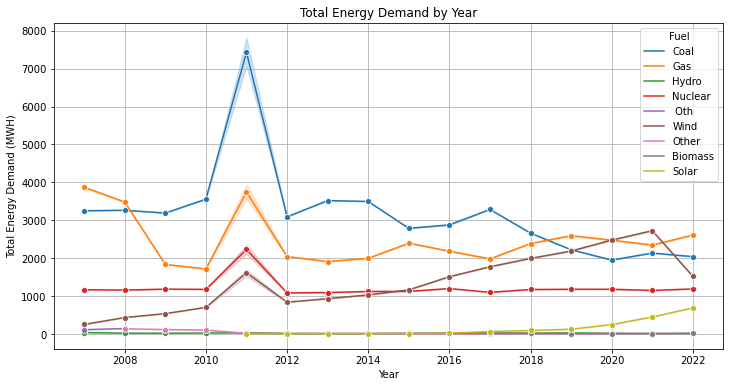

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Create a line plot to show the trend of energy demand by year
sns.lineplot(x='Year', y='Demand', hue='Fuel', data=df, marker='o')

# Customize the plot
plt.title('Total Energy Demand by Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Demand (MWH)')
plt.grid(True)

plt.show()


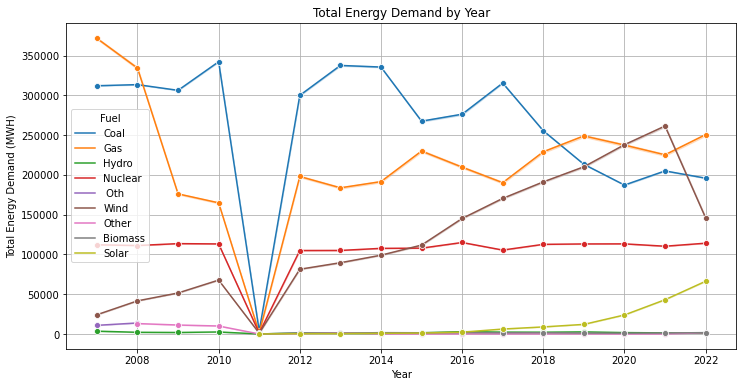

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Create a line plot to show the trend of energy demand by year
sns.lineplot(x='Year', y='Daily MWH', hue='Fuel', data=df, marker='o')

# Customize the plot
plt.title('Total Energy Demand by Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Demand (MWH)')
plt.grid(True)

plt.show()

##### there a problem in 2011 with our ERCOT data so we will just curb the data for 2012 onward

### Now lets see how the data prepares with an aggreate vs 15 min intervals

In [24]:
# Filter the DataFrame to include only data from 2012 onward
clean_df = df[df['Date'] >= '2012-01-01']

In [25]:
# Drop unnecessary columns
columns_to_drop = ['Time', 'Combined']
df_cleaned = clean_df.drop(columns=columns_to_drop)

In [26]:
# Identify numeric and categorical columns
numeric_columns = df_cleaned.select_dtypes(include='number').columns.tolist()
categorical_columns = df_cleaned.select_dtypes(include='category').columns.tolist()


In [27]:
# Custom aggregation function for numeric columns (sum)
def custom_sum(series):
    return series.sum()

# Custom aggregation function for categorical columns (join unique values)
def custom_category(series):
    return ', '.join(series.unique())

# Custom aggregation function for 'Fuel' column (join unique values)
def custom_fuel(series):
    return ', '.join(series.unique())

In [28]:
# Define aggregation functions for each column type
aggregation_dict = {
    'Demand': custom_sum,
    'Daily MWH': custom_sum,
    'Fuel': custom_fuel,
    **{col: custom_category for col in categorical_columns},
    **{col: 'first' for col in df_cleaned.columns if col not in ['Date', 'Demand', 'Daily MWH', 'Fuel'] + categorical_columns}
}

In [29]:
# Aggregate the data
aggregated_df = df_cleaned.groupby('Date').agg(aggregation_dict).reset_index()


In [30]:
aggregated_df.head()

,Date,Demand,Daily MWH,Fuel,Unnamed: 0,HashedIndex,Year,Month,Day,Temp Max Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,2012-01-01,642720.686962,6.426377e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1207811,1003d440ef7f6418945dab081227908cbb4e820ef78044...,2012,1,1,59.0,...,76,49.8,21,12,6.7,0,27.6,27.5,27.3,0.0
1,2012-01-02,750966.943826,7.532679e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1208684,e58dfaff1136adb2243f2014c34f13f46b8cec5460af20...,2012,1,2,53.0,...,85,51.5,19,6,3.3,0,27.7,27.6,27.5,0.0
2,2012-01-03,816505.754147,8.208624e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1209557,83c1254b539045342fc5cba2cca5c504a82e07d05d8cb0...,2012,1,3,59.0,...,69,42.4,22,15,9.3,0,27.5,27.3,27.1,0.0
3,2012-01-04,756998.375794,7.628733e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1210430,b11752f6bb11737e17a3134abed6f27bd96410c22cfd2f...,2012,1,4,62.0,...,76,47.3,19,21,9.9,0,27.4,27.3,27.1,0.0
4,2012-01-05,721998.966910,7.262309e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1211303,3de46d7a899bc5a056ca05559b57b0b010db1c15b2ffcc...,2012,1,5,65.0,...,79,48.0,20,15,7.2,0,27.3,27.2,27.0,0.0


In [31]:
#save clean data to csv
aggregated_df.to_csv('aggregated_data.csv', index=True)

## Agg data cleaned start here

In [1]:
# Begin Script from here 

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:/Users/19405/MSDS_QuantifyingTheWorld/Case Study Seven/aggregated_data.csv'

# Read the CSV file into a DataFrame
aggregated_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
aggregated_df.head()

,Unnamed: 0.1,Date,Demand,Daily MWH,Fuel,Unnamed: 0,HashedIndex,Year,Month,Day,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,0,2012-01-01,642720.686962,6.426377e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1207811,1003d440ef7f6418945dab081227908cbb4e820ef78044...,2012,1,1,...,76,49.8,21,12,6.7,0,27.6,27.5,27.3,0.0
1,1,2012-01-02,750966.943826,7.532679e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1208684,e58dfaff1136adb2243f2014c34f13f46b8cec5460af20...,2012,1,2,...,85,51.5,19,6,3.3,0,27.7,27.6,27.5,0.0
2,2,2012-01-03,816505.754147,8.208624e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1209557,83c1254b539045342fc5cba2cca5c504a82e07d05d8cb0...,2012,1,3,...,69,42.4,22,15,9.3,0,27.5,27.3,27.1,0.0
3,3,2012-01-04,756998.375794,7.628733e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1210430,b11752f6bb11737e17a3134abed6f27bd96410c22cfd2f...,2012,1,4,...,76,47.3,19,21,9.9,0,27.4,27.3,27.1,0.0
4,4,2012-01-05,721998.966910,7.262309e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",1211303,3de46d7a899bc5a056ca05559b57b0b010db1c15b2ffcc...,2012,1,5,...,79,48.0,20,15,7.2,0,27.3,27.2,27.0,0.0


In [2]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'HashedIndex']
agg_df = aggregated_df.drop(columns=columns_to_drop)

In [3]:
# Display the first few rows of the DataFrame
agg_df.head()

,Date,Demand,Daily MWH,Fuel,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,2012-01-01,642720.686962,6.426377e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",2012,1,1,59.0,49.2,41,...,76,49.8,21,12,6.7,0,27.6,27.5,27.3,0.0
1,2012-01-02,750966.943826,7.532679e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",2012,1,2,53.0,42.6,35,...,85,51.5,19,6,3.3,0,27.7,27.6,27.5,0.0
2,2012-01-03,816505.754147,8.208624e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",2012,1,3,59.0,44.8,30,...,69,42.4,22,15,9.3,0,27.5,27.3,27.1,0.0
3,2012-01-04,756998.375794,7.628733e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",2012,1,4,62.0,47.8,39,...,76,47.3,19,21,9.9,0,27.4,27.3,27.1,0.0
4,2012-01-05,721998.966910,7.262309e+07,"Biomass, Coal, Gas, Hydro, Nuclear, Other, Sol...",2012,1,5,65.0,49.2,36,...,79,48.0,20,15,7.2,0,27.3,27.2,27.0,0.0


### We've handled aggregation, now i got to get rid of the extra columns then to correlations now

### Examine any Correlations 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [5]:
correlation_matrix = agg_df.corr()

In [6]:
correlation_matrix

,Demand,Daily MWH,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,Dew Point Avg Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
Demand,1.000000,0.998556,0.421580,0.152721,-0.010279,0.512834,0.545890,0.545449,0.432452,0.474195,...,-0.091161,-0.063927,0.004509,0.003301,0.024233,0.057660,-0.097268,-0.034661,-0.022430,0.034205
Daily MWH,0.998556,1.000000,0.415825,0.153455,-0.011015,0.515104,0.547780,0.546830,0.433155,0.474886,...,-0.092165,-0.064890,0.003908,0.002123,0.022785,0.057394,-0.097370,-0.036273,-0.023103,0.033196
Year,0.421580,0.415825,1.000000,0.000310,-0.000356,-0.009468,-0.003492,-0.008515,0.010357,0.024156,...,-0.016903,-0.023277,-0.019195,-0.021575,-0.000940,-0.000097,0.102665,0.080330,0.028703,0.042557
Month,0.152721,0.153455,0.000310,1.000000,0.010398,0.188231,0.195822,0.194549,0.187351,0.196287,...,0.111160,0.147761,0.159493,-0.150869,-0.160738,-0.076175,0.035252,0.023023,0.001811,0.021122
Day,-0.010279,-0.011015,-0.000356,0.010398,1.000000,0.019635,0.019937,0.020047,0.012025,0.013750,...,-0.001232,-0.025587,-0.031421,0.033836,0.017378,-0.017246,-0.053629,-0.039993,-0.023989,0.005174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wind Speed Min Midland Far West,0.057660,0.057394,-0.000097,-0.076175,-0.017246,0.109127,0.128156,0.134477,0.137490,0.129513,...,-0.104382,-0.041959,0.029355,0.373173,0.689525,1.000000,-0.202385,-0.096092,0.000494,-0.054891
Pressures Inch Max Midland Far West,-0.097268,-0.097370,0.102665,0.035252,-0.053629,-0.488539,-0.500794,-0.493172,-0.553452,-0.554890,...,0.108621,0.220589,0.286267,-0.273378,-0.284361,-0.202385,1.000000,0.464803,0.112894,0.004075
Pressure InchAvg Midland Far West,-0.034661,-0.036273,0.080330,0.023023,-0.039993,-0.227443,-0.226351,-0.214456,-0.261285,-0.251030,...,0.061554,0.131922,0.174565,-0.159063,-0.164010,-0.096092,0.464803,1.000000,0.775876,0.015737
Pressure Inch Min Midland Far West,-0.022430,-0.023103,0.028703,0.001811,-0.023989,-0.066713,-0.063268,-0.056720,-0.066773,-0.059716,...,0.022925,0.055021,0.083742,-0.027427,-0.023757,0.000494,0.112894,0.775876,1.000000,-0.009664


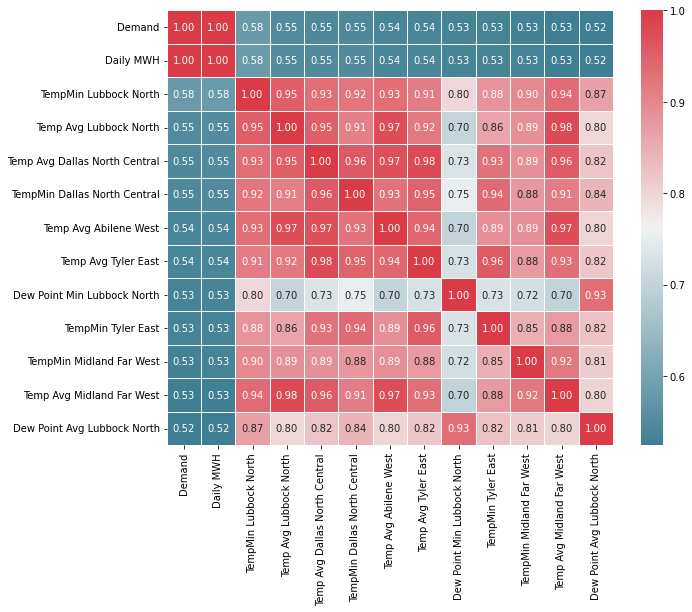

In [7]:
# Select correlations above 0.4 or below -0.4 for the target variable
target_corr = correlation_matrix['Demand']
target_corr = target_corr[(target_corr > 0.52) | (target_corr < -0.45)].sort_values(ascending=False)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros((len(target_corr), len(target_corr)))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the color palette if desired
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the selected correlations
sns.heatmap(correlation_matrix.loc[target_corr.index, target_corr.index], 
            annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=.5)


plt.show()

There are a number of correlations now that we have refitted the dataframe across vs long, there is a high degree of correlation among the dw point and the temperature data across Texas, however that is a likely scenario.

## EDA Exploratory Data Analysis

In [8]:
#Visualize the distribution of the target variable

#ax = sns.countplot(x='Demand', data=merged_df)
#plt.title('Distribution of Demand Feature')

# Add annotations for the count of each class

#for p in ax.patches:
#    count = p.get_height()
#    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas

#ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#plt.show()


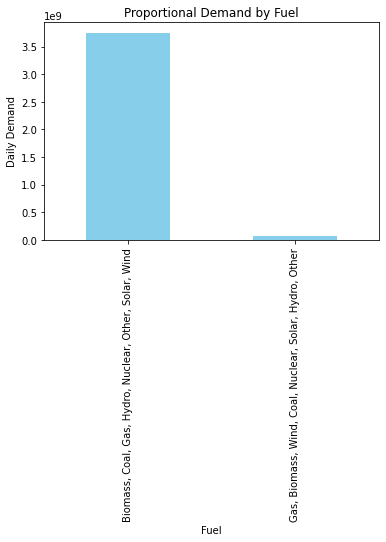

In [9]:
# Plot the bar chart
agg_df.groupby('Fuel')['Demand'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Fuel')
plt.xlabel('Fuel')
plt.ylabel('Daily Demand')
plt.show()

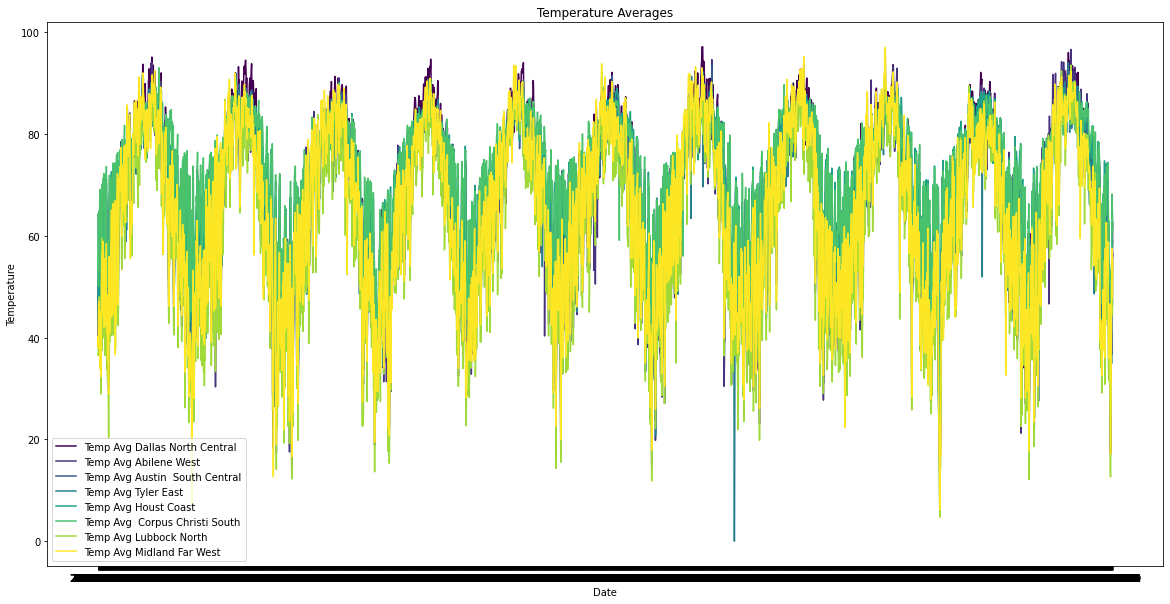

In [10]:
# Filter columns that contain 'Temp Avg'
temp_avg_cols = [col for col in agg_df.columns if 'Temp Avg' in col]

# Plotting
plt.figure(figsize=(20, 10))

# Generate a different color for each column
colors = plt.cm.viridis(np.linspace(0, 1, len(temp_avg_cols)))

for col, color in zip(temp_avg_cols, colors):
    plt.plot(agg_df['Date'], agg_df[col], label=col, color=color)

plt.title('Temperature Averages')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Univariate Analysis

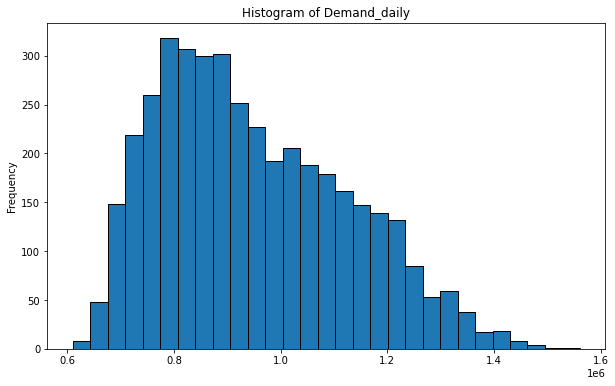

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Demand'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Demand_daily')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

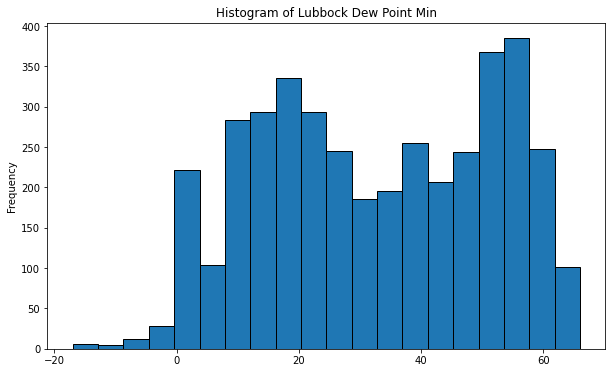

In [12]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Min Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Lubbock Dew Point Min')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

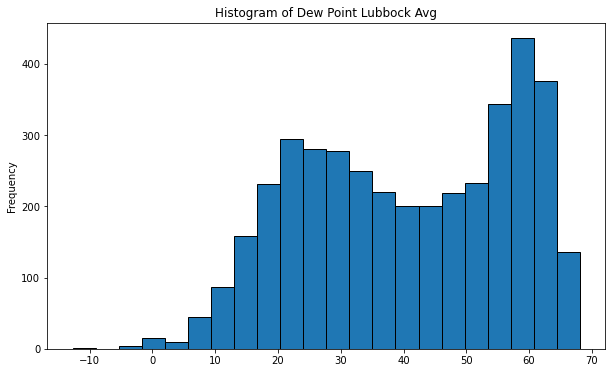

In [13]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Lubbock Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

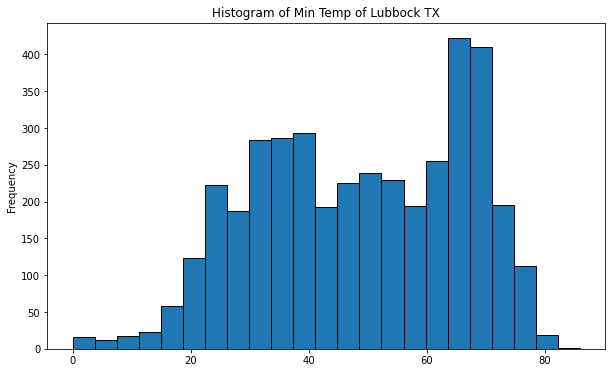

In [14]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['TempMin Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

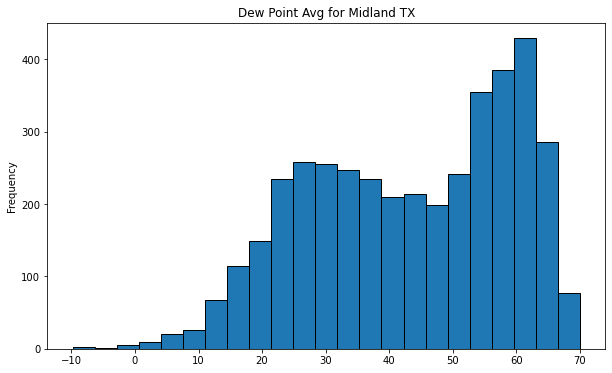

In [15]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Avg Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Dew Point Avg for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

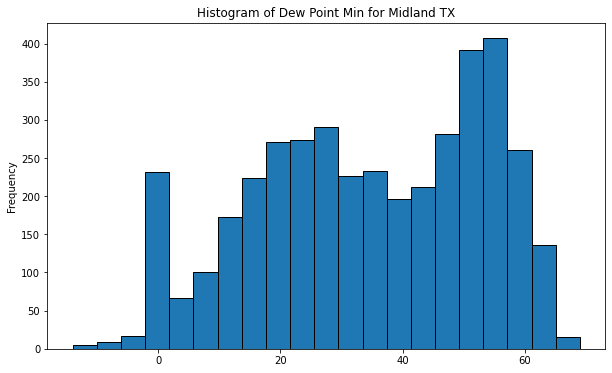

In [16]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Min Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Min for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

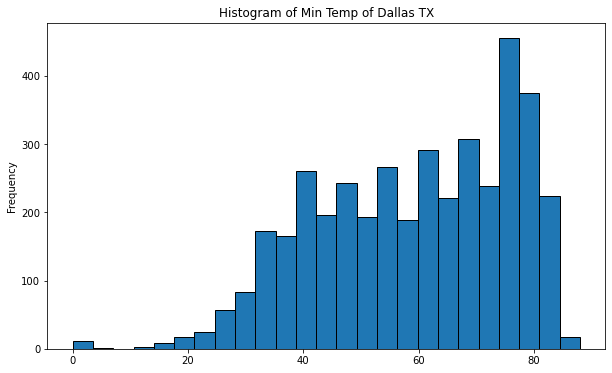

In [17]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['TempMin Dallas North Central'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Dallas TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

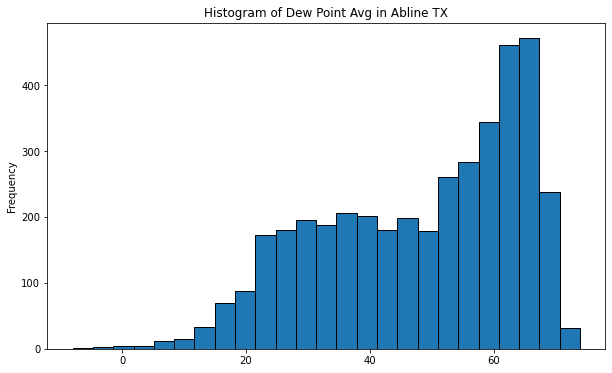

In [18]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Avg Abilene West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Avg in Abline TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

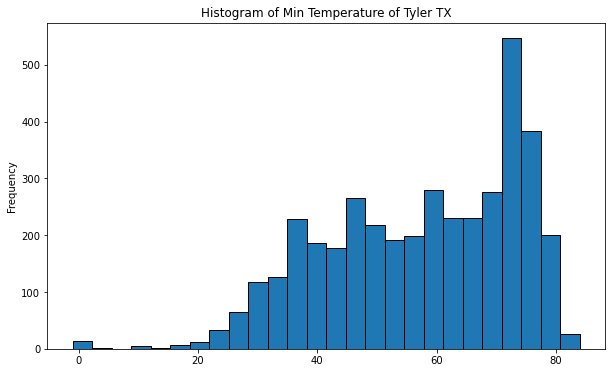

In [19]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['TempMin Tyler East'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temperature of Tyler TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

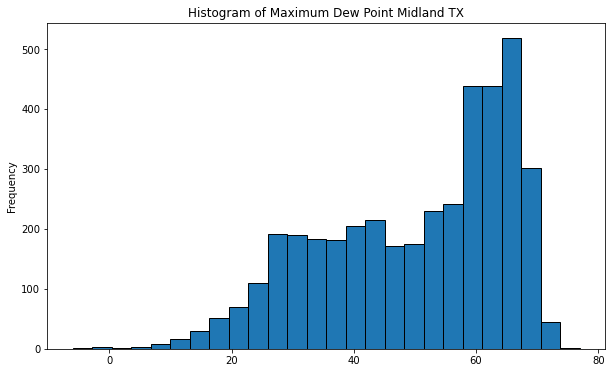

In [20]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Dew Point Max Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Maximum Dew Point Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

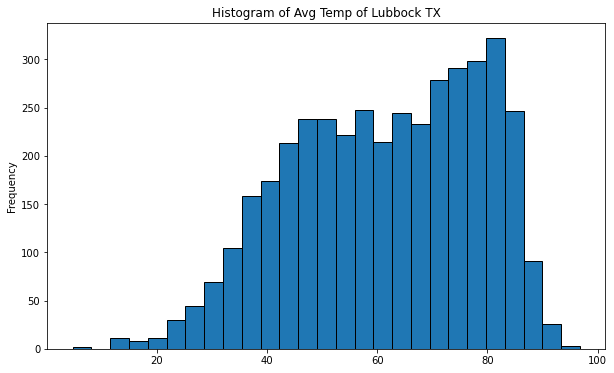

In [21]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(agg_df['Temp Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Avg Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

### Imputation

In [22]:
# List of categorical columns to one-hot encode
categorical_columns = ['Fuel']#, 'Weather Station', 'ERCOT Region']

# Use pd.get_dummies to create dummy variables
imputation_df = pd.get_dummies(agg_df, columns=categorical_columns, prefix=categorical_columns)

imputation_df.head()

,Date,Demand,Daily MWH,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,...,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West,"Fuel_Biomass, Coal, Gas, Hydro, Nuclear, Other, Solar, Wind","Fuel_Gas, Biomass, Wind, Coal, Nuclear, Solar, Hydro, Other"
0,2012-01-01,642720.686962,6.426377e+07,2012,1,1,59.0,49.2,41,33,...,21,12,6.7,0,27.6,27.5,27.3,0.0,1,0
1,2012-01-02,750966.943826,7.532679e+07,2012,1,2,53.0,42.6,35,28,...,19,6,3.3,0,27.7,27.6,27.5,0.0,1,0
2,2012-01-03,816505.754147,8.208624e+07,2012,1,3,59.0,44.8,30,27,...,22,15,9.3,0,27.5,27.3,27.1,0.0,1,0
3,2012-01-04,756998.375794,7.628733e+07,2012,1,4,62.0,47.8,39,38,...,19,21,9.9,0,27.4,27.3,27.1,0.0,1,0
4,2012-01-05,721998.966910,7.262309e+07,2012,1,5,65.0,49.2,36,38,...,20,15,7.2,0,27.3,27.2,27.0,0.0,1,0


In [23]:
print(aggregated_df.columns)

Index(['Unnamed: 0.1', 'Date', 'Demand', 'Daily MWH', 'Fuel', 'Unnamed: 0',
       'HashedIndex', 'Year', 'Month', 'Day',
       ...
       'Humidity Percent Max Midland Far West',
       'Humidity Percent Avg Midland Far West',
       'Humidity Percent Min Midland Far West',
       'Wind Speed Max Midland Far West', 'Wind Speed Avg Midland Far West',
       'Wind Speed Min Midland Far West',
       'Pressures Inch Max Midland Far West',
       'Pressure InchAvg Midland Far West',
       'Pressure Inch Min Midland Far West',
       'Precipitation Total Midland Far West'],
      dtype='object', length=138)


In [24]:
print(aggregated_df.dtypes)

Unnamed: 0.1                              int64
Date                                     object
Demand                                  float64
Daily MWH                               float64
Fuel                                     object
                                         ...   
Wind Speed Min Midland Far West           int64
Pressures Inch Max Midland Far West     float64
Pressure InchAvg Midland Far West       float64
Pressure Inch Min Midland Far West      float64
Precipitation Total Midland Far West    float64
Length: 138, dtype: object


### Modeling 

### Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score


# List of targets to drop
features_to_drop = ['Demand','Date']

# Split the data into features (X) and target variable (y)
X = imputation_df.drop(features_to_drop, axis=1)  # Remove the target variable from features
y = imputation_df['Demand']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [27]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

Mean Squared Error: 97582863.19434269
Mean Absolute Error: 7092.042626345343
R^2 Score: 0.9968489058069655
Root Mean Squared Error: 9878.403878883606
Explained Variance Score: 0.9968536637240049


Mean Squared Error (MSE):

Interpretation: In the context of energy demand prediction, the MSE measures the average of the squared differences between the predicted and actual energy demand values. The units of MSE are squared, which might be less intuitive, but it heavily penalizes large errors. A lower MSE indicates that, on average, your model's predictions are closer to the actual energy demand values.

Example: A MSE of 
97582863.19434269
97582863.19434269 means that, on average, the squared difference between predicted and actual energy demand is around 
97582863
97582863 MWH².

Mean Absolute Error (MAE):

Interpretation: The MAE represents the average absolute difference between predicted and actual energy demand. It gives a sense of the average magnitude of errors, without considering their direction.

Example: A MAE of 
7092.042626345343
7092.042626345343 means that, on average, your model's predictions deviate by approximately 
7092
7092 MWH from the actual energy demand.

R-squared (R²) Score:

Interpretation: The R² score provides a measure of how well your model explains the variance in the total energy demand. It represents the proportion of the variance in the dependent variable (energy demand) that is predictable from the independent variables (features).

Example: An R² score of 
0.9968489058069655
0.9968489058069655 means that approximately 
99.68
%
99.68% of the variance in the energy demand is explained by your model. This is exceptionally high and suggests a very good fit.

Root Mean Squared Error (RMSE):

Interpretation: RMSE is the square root of the MSE and is in the same unit as the target variable. It provides an easily interpretable measure of the average magnitude of errors.

Example: An RMSE of 
9878.403878883606
9878.403878883606 means that, on average, your model's predictions deviate by approximately 
9878
9878 MWH from the actual energy demand.

Explained Variance Score:

Interpretation: Similar to R², the explained variance score measures the proportion of variance in the energy demand that is explained by your model.

Example: An explained variance score of 
0.9968536637240049
0.9968536637240049 means that approximately 
99.69
%
99.69% of the variance in the energy demand is explained by your model.

In summary, your regression model is performing exceptionally well. The high R² score and explained variance suggest that your model captures a significant portion of the variability in total energy demand. The MSE, MAE, and RMSE values indicate that, on average, your model's predictions are very close to the actual energy demand values. These metrics collectively suggest that your model is accurate and reliable for predicting daily total energy demand.

In [30]:
y2_true = y_test

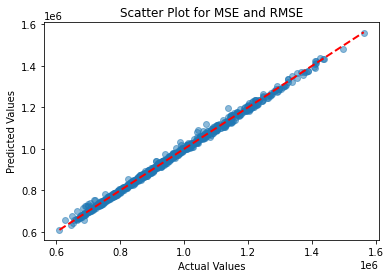

In [31]:
# Assuming y_pred and y_true are your predicted and actual values
plt.scatter(y2_true, y_pred, alpha=0.5)
plt.plot([min(y2_true), max(y2_true)], [min(y2_true), max(y2_true)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot for MSE and RMSE')
plt.show()


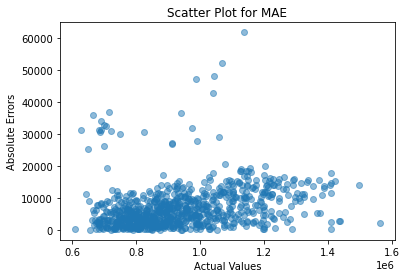

In [32]:
plt.scatter(y2_true, np.abs(y2_true - y_pred), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Absolute Errors')
plt.title('Scatter Plot for MAE')
plt.show()


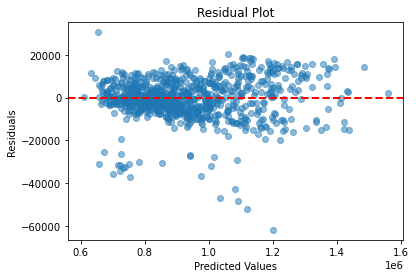

In [33]:
residuals = y2_true - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


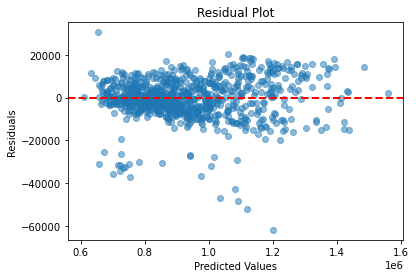

In [34]:
residuals = y2_true - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


MAPE= 
n
1
​
 ∑ 
i=1
n
​
  
∣
∣
​
  
y 
true,i
​
 
y 
true,i
​
 −y 
pred,i
​
 
​
  
∣
∣
​
 ×100

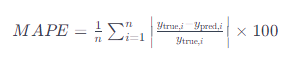

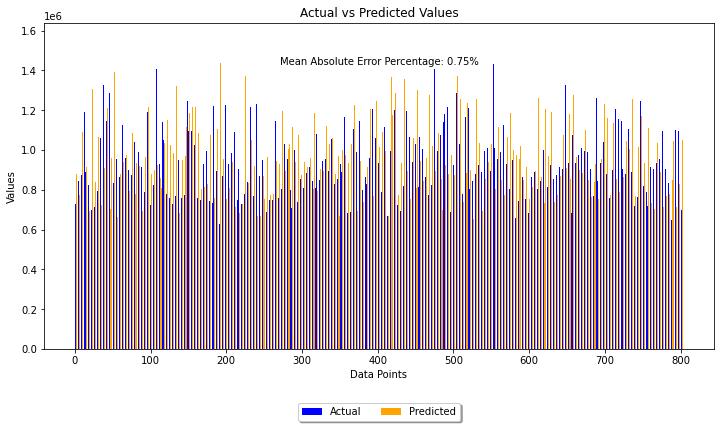

Mean Absolute Error Percentage: 0.75%
The code block took 1.7850 seconds to execute.


In [35]:
import time

# Record the start time
start_time = time.time()

# Ensure that y2_true and y_pred2 have the same length
if len(y2_true) == len(y_pred):
    # Calculate absolute errors and percentage errors
    abs_errors = np.abs(y2_true - y_pred)
    percentage_errors = (abs_errors / y2_true) * 100

    # Set a larger figure size
    plt.figure(figsize=(12, 6))
    
    # Plot side-by-side bar chart for actual and predicted values
    bar_width = 0.35
    index = np.arange(len(y2_true))
    
    plt.bar(index, y2_true, width=bar_width, label='Actual', color='blue')
    plt.bar(index + bar_width, y_pred, width=bar_width, label='Predicted', color='orange')
    
    # Display Mean Absolute Error Percentage on the graph
    mean_absolute_error_percentage = np.mean(percentage_errors)
    plt.text(0.5, 0.88, f'Mean Absolute Error Percentage: {mean_absolute_error_percentage:.2f}%', 
             transform=plt.gca().transAxes, fontsize=10, ha='center', va='center')
    
    # Position the legend outside the plot area
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    # Alternatively, print it below the graph
    print(f'Mean Absolute Error Percentage: {mean_absolute_error_percentage:.2f}%')
else:
    print("Error: y2_true and y_pred must have the same length.")
    
    
# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f'The code block took {elapsed_time:.4f} seconds to execute.')


The Mean Absolute Error Percentage (MAEP) is a metric used to evaluate the accuracy of a model's predictions, particularly in the context of regression problems. It represents the average percentage difference between the predicted values and the actual values. In your case, a MAEP of 15.98% means, on average, your model's predictions are off by approximately 0.75% relative to the actual values.

Here's how you interpret it:

If MAEP is 0%, it indicates perfect predictions, meaning the model's predictions match the actual values exactly.

A lower MAEP is generally better, as it signifies that, on average, the model's predictions are closer to the actual values.

A higher MAEP suggests that, on average, the model's predictions have a larger percentage difference from the actual values.

Interpretation of MAEP (0.75%):


This is a small percentage, suggesting that your model is accurate and provides reliable predictions for daily total energy demand.
Implications:

A low MAEP is particularly important in energy demand prediction, where precise forecasts are crucial for efficient resource planning and utilization.
With a MAEP of 0.75%, your model's predictions align closely with the actual energy demand, indicating high accuracy.
Considerations:

It's always essential to consider the specific requirements of your application. Depending on the context, a 0.75% error might be more than acceptable or may need further improvement.
Next Steps:

Given the excellent performance indicated by a low MAEP, you might consider using this model for operational planning, resource allocation, or decision-making related to energy demand.
Additionally, you may want to monitor the model's performance over time and across different scenarios to ensure its continued accuracy.
Overall, achieving a MAEP of 0.75% is a notable achievement and suggests that your linear regression model is well-suited for predicting daily total energy demand. 

#### Cross-Validation Linear Model

In [36]:
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

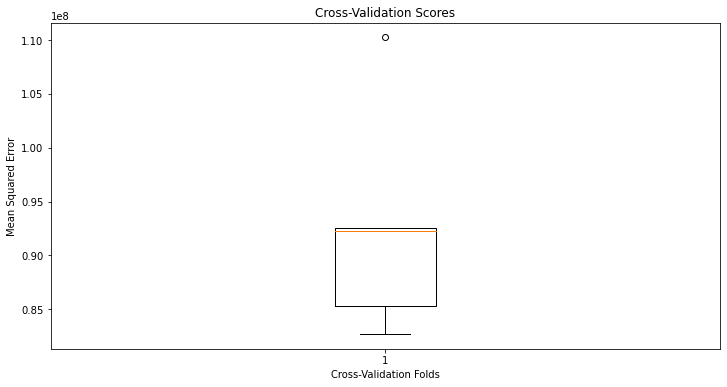

In [37]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Assuming 'scores' contains the cross-validation scores
plt.figure(figsize=(12, 6))
plt.boxplot(-scores)  # Taking negative because cross_val_score returns negative MSE
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Scores')
plt.show()

In [38]:
# Convert the scores to positive values and calculate mean
mean_mse = np.mean(-scores)
print("Mean MSE:", mean_mse)

Mean MSE: 92610252.93130171


#### Time Series Split Model

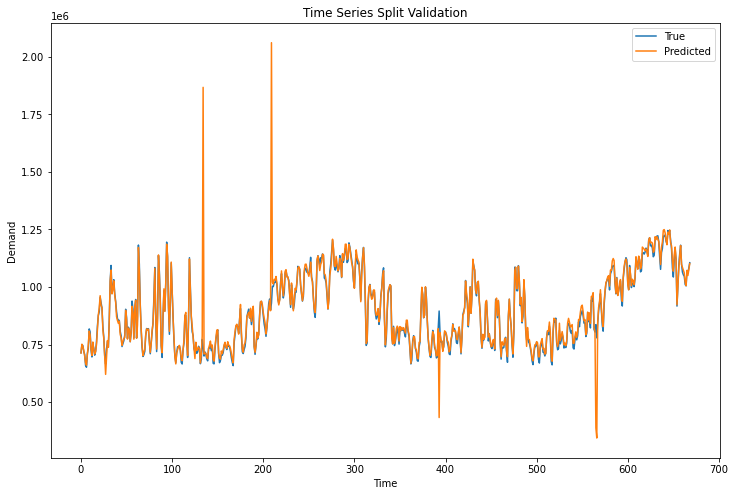

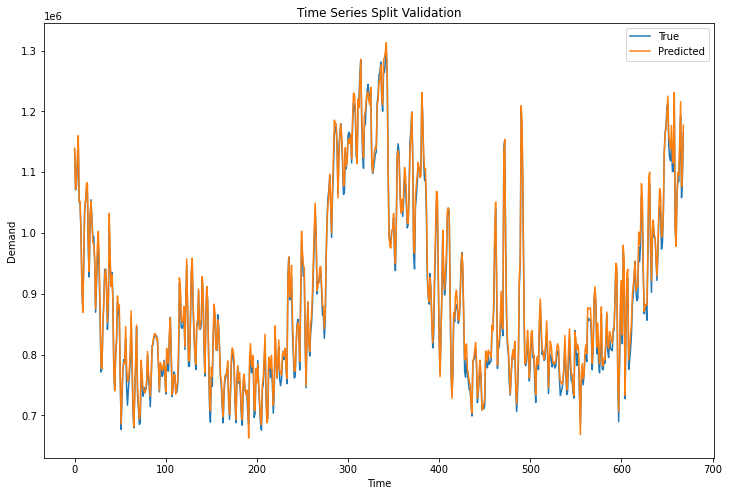

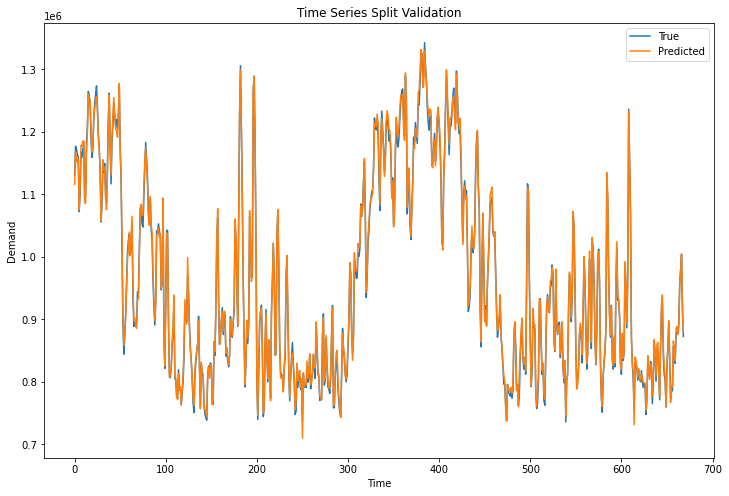

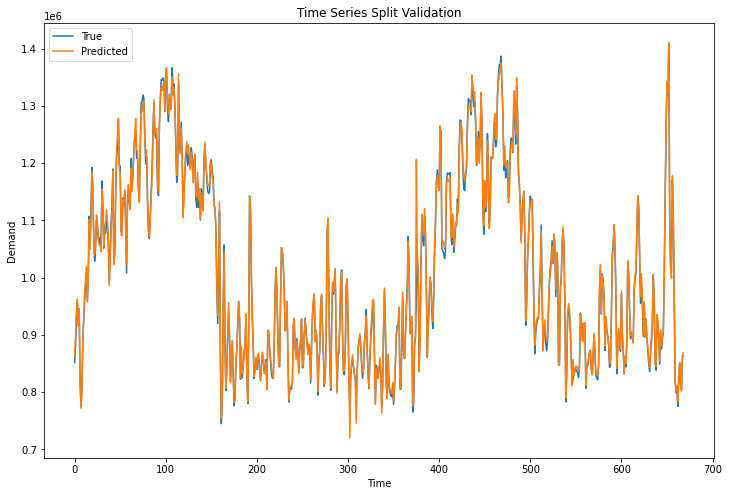

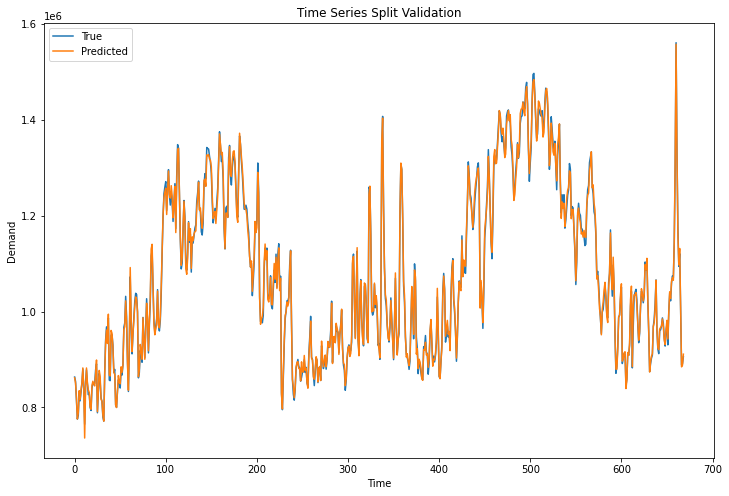

In [39]:
from sklearn.model_selection import TimeSeriesSplit

# Convert X and y to NumPy arrays
X_array = X.values
y_array = y.values

# Perform Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Train your model (e.g., Linear Regression)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(12, 8))
    
    # Plot true vs predicted values
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Demand')
    plt.title('Time Series Split Validation')
    plt.legend()
    plt.show()

In [40]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

MSE: 87316495.66683032
Mean Absolute Error: 7495.40484379125
R^2 Score: 0.997192360413784
Root Mean Squared Error: 9344.329599646531
Explained Variance Score: 0.9972263155727432


#### Holdout Validation

In [41]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=117)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=117)


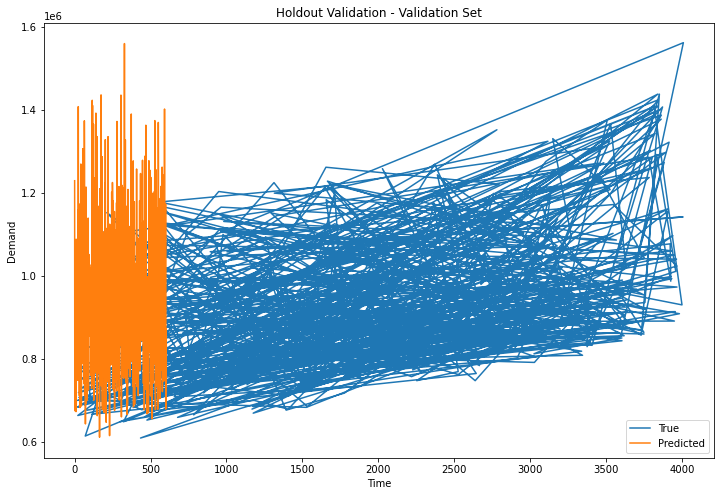

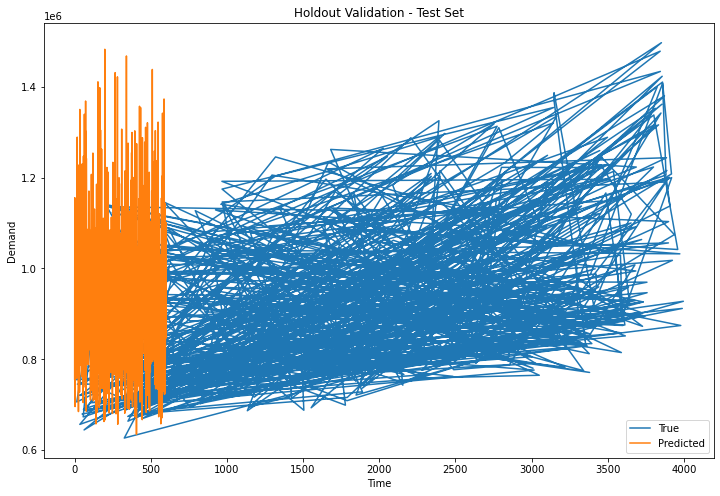

In [42]:
plt.figure(figsize=(12, 8))

# Train your model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)

# Plot true vs predicted values on the validation set
plt.plot(y_valid, label='True')
plt.plot(y_pred_valid, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Holdout Validation - Validation Set')
plt.legend()
plt.show()

# Final evaluation on the test set
y_pred_test = model.predict(X_test)

# Plot true vs predicted values on the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Holdout Validation - Test Set')
plt.legend()
plt.show()


In [43]:
# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)

mse_valid = mean_squared_error(y_valid, y_pred_valid)
print("Validation MSE:", mse_valid)

mae = mean_absolute_error(y_valid, y_pred_valid)
print(f'Validation Mean Absolute Error: {mae}')


# Final evaluation on the test set
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_test)



Validation MSE: 95451238.21552992
Validation Mean Absolute Error: 7083.193349849103
Test MSE: 97508546.6035202


Linear regression can still be a useful tool for predicting demand even if you can't perfectly predict weather conditions. While you may not be able to predict weather with 100% accuracy, incorporating weather-related features into your model can still provide valuable information and improve the accuracy of your predictions.

Regarding the concern about the train-test split, it's still valid to perform a split even if you're using weather-related features. The purpose of the train-test split is to evaluate how well your model generalizes to unseen data. By splitting your dataset into a training set and a testing set (e.g., 80/20 split), you can train your model on a portion of the data and then evaluate its performance on data it hasn't seen before.

Even though you can't predict weather perfectly, including weather-related features in your model can still capture some of the variability in demand that is related to weather conditions. This can lead to more accurate predictions compared to using only historical demand data.

Regarding the concern about predicting weather, it's true that weather forecasts may not be perfect. However, you can still use historical weather data as features in your model, as they can provide valuable information about how weather conditions have historically influenced energy demand. Additionally, you may want to explore alternative data sources or techniques for incorporating weather forecasts into your model, such as ensemble methods or using probabilistic weather forecasts.

Overall, predicting energy demand is a complex problem that requires careful consideration of various factors, including weather, temporal dependencies, and feature engineering. Experimenting with different approaches and continuously refining your model based on performance evaluation is key to building an accurate predictive model.

#### Time Series Models Python

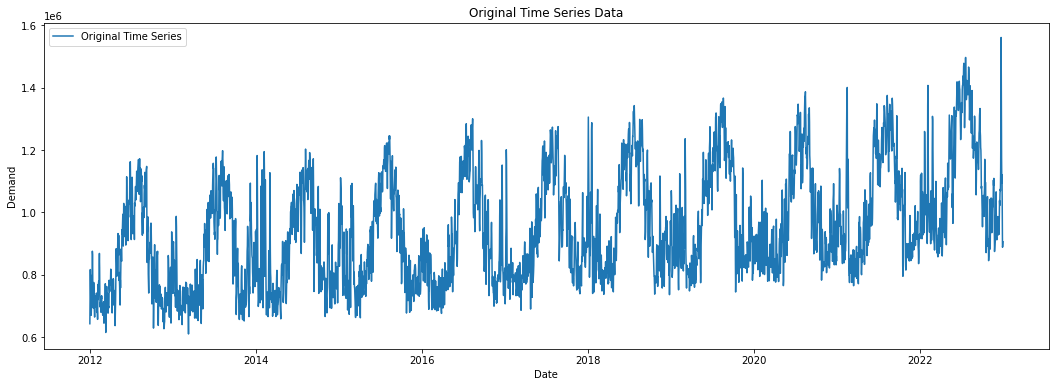

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your time series data is in a CSV file, adjust the file path accordingly
file_path = 'C:/Users/19405/MSDS_QuantifyingTheWorld/Case Study Seven/aggregated_data.csv'

# Load the time series data
time_series_df = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime object
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

# Set the 'Date' column as the index
time_series_df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(18, 6))
plt.plot(time_series_df.index, time_series_df['Demand'], label='Original Time Series')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [45]:
# Split the data into training and testing sets
train_size = int(len(time_series_df) * 0.8)
train, test = time_series_df[:train_size], time_series_df[train_size:]

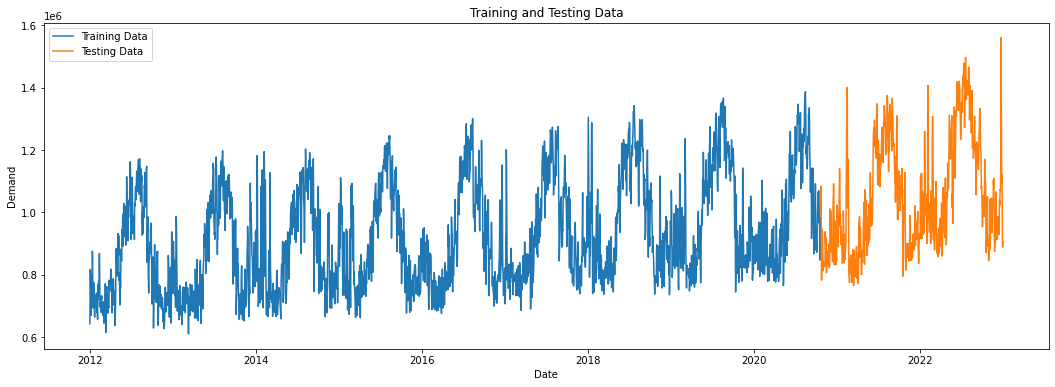

In [46]:
# Plot the training and testing sets
plt.figure(figsize=(18, 6))
plt.plot(train.index, train['Demand'], label='Training Data')
plt.plot(test.index, test['Demand'], label='Testing Data')
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [47]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Fit auto ARIMA model
auto_model = auto_arima(train['Demand'], suppress_warnings=True, seasonal=False)

# Get the best order
best_order = auto_model.get_params()['order']
print(f'Best ARIMA Order: {best_order}')

Best ARIMA Order: (2, 1, 2)



The "Best ARIMA Order" represents the optimal set of parameters for an ARIMA (AutoRegressive Integrated Moving Average) model. The order is usually denoted as (p, d, q), where:

p: The order of the autoregressive (AR) component, representing the number of lag observations included in the model.
d: The order of differencing needed to make the time series stationary. In other words, it represents the number of times the series needs to be differenced to achieve stationarity.
q: The order of the moving average (MA) component, representing the size of the moving average window.
In your case, a "Best ARIMA Order" of (2, 1, 2) means:

p (AR): 2
d (Differencing): 1
q (MA): 2
Interpretation:

AR (Autoregressive) Component (p=2):

There are two lag observations included in the model. The current value of the time series is assumed to be dependent on the two previous values.
Differencing (d=1):

One differencing step is applied to make the time series stationary. This suggests that first-order differencing is required to achieve stationarity.
MA (Moving Average) Component (q=2):

The moving average component has a size of 2, meaning the model considers the errors from the two previous time steps.
In summary, an ARIMA(2, 1, 2) model has been identified as the best-fitting model for your time series data based on the auto_arima function's optimization process. This model configuration is often determined through methods like grid search or automated algorithms to find the parameters that minimize a chosen criterion (e.g., AIC, BIC) and provide the best fit to the data.

In [48]:
# Fit the best model
best_model = ARIMA(train['Demand'], order=best_order).fit()

C:\Users\19405\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\19405\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\19405\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
# Define the number of steps to forecast for different time horizons
forecast_steps_1_month = 31
forecast_steps_3_months = 91
forecast_steps_6_months = 182
forecast_steps_12_months = 364

# Forecast for different time horizons
forecast_1_month = best_model.get_forecast(steps=forecast_steps_1_month)
forecast_3_months = best_model.get_forecast(steps=forecast_steps_3_months)
forecast_6_months = best_model.get_forecast(steps=forecast_steps_6_months)
forecast_12_months = best_model.get_forecast(steps=forecast_steps_12_months)

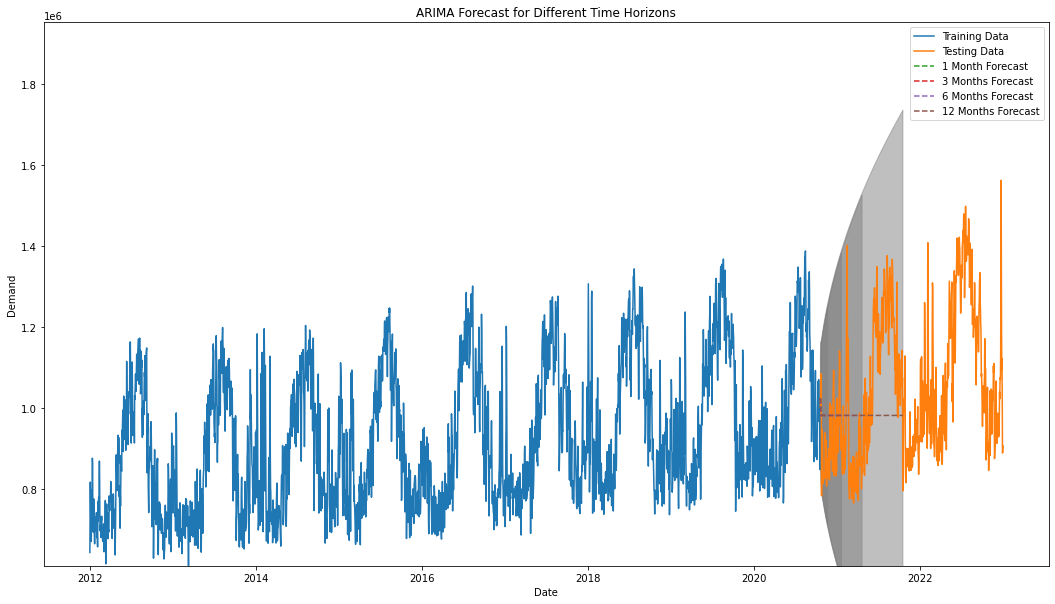

In [50]:
# Set a larger figure size
plt.figure(figsize=(18, 10))

# Plot the original time series
plt.plot(train['Demand'], label='Training Data')
plt.plot(test['Demand'], label='Testing Data')

# Plot the forecasts for different time horizons
plt.plot(forecast_1_month.predicted_mean.index, forecast_1_month.predicted_mean.values, label='1 Month Forecast', linestyle='dashed')
plt.plot(forecast_3_months.predicted_mean.index, forecast_3_months.predicted_mean.values, label='3 Months Forecast', linestyle='dashed')
plt.plot(forecast_6_months.predicted_mean.index, forecast_6_months.predicted_mean.values, label='6 Months Forecast', linestyle='dashed')
plt.plot(forecast_12_months.predicted_mean.index, forecast_12_months.predicted_mean.values, label='12 Months Forecast', linestyle='dashed')

# Plot confidence intervals if available
plt.fill_between(forecast_1_month.predicted_mean.index, forecast_1_month.conf_int()['lower Demand'], forecast_1_month.conf_int()['upper Demand'], color='gray', alpha=0.5)
plt.fill_between(forecast_3_months.predicted_mean.index, forecast_3_months.conf_int()['lower Demand'], forecast_3_months.conf_int()['upper Demand'], color='gray', alpha=0.5)
plt.fill_between(forecast_6_months.predicted_mean.index, forecast_6_months.conf_int()['lower Demand'], forecast_6_months.conf_int()['upper Demand'], color='gray', alpha=0.5)
plt.fill_between(forecast_12_months.predicted_mean.index, forecast_12_months.conf_int()['lower Demand'], forecast_12_months.conf_int()['upper Demand'], color='gray', alpha=0.5)

# Adjust the Y-axis range if needed
plt.ylim([min(train['Demand']), max(test['Demand']) * 1.25])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('ARIMA Forecast for Different Time Horizons')
plt.legend()
plt.show()


In [51]:
# Extract forecasted values for the testing period
forecast_value_1_month = forecast_1_month.predicted_mean
forecast_value_3_months = forecast_3_months.predicted_mean
forecast_value_6_months = forecast_6_months.predicted_mean

# Access the forecasted values for specific dates
forecast_value_1_month_at_date = forecast_value_1_month  # Use the specific date for the one-month forecast
forecast_value_3_months_at_date = forecast_value_3_months  # Use the specific date for the three-month forecast
forecast_value_6_months_at_date = forecast_value_6_months  # Use the specific date for the six-month forecast


In [52]:
# Extract forecasted values for the testing period
forecast_value_1_month = forecast_1_month.predicted_mean
forecast_value_3_months = forecast_3_months.predicted_mean
forecast_value_6_months = forecast_6_months.predicted_mean

# Access the forecasted values for specific dates
forecast_value_1_month_at_date = forecast_value_1_month.iloc[0]  # Use the specific date for the one-month forecast
forecast_value_3_months_at_date = forecast_value_3_months.iloc[0]  # Use the specific date for the three-month forecast
forecast_value_6_months_at_date = forecast_value_6_months.iloc[0]  # Use the specific date for the six-month forecast

# Print the forecasted values
print("1-Month Forecast at specific date:", forecast_value_1_month_at_date)
print("3-Months Forecast at specific date:", forecast_value_3_months_at_date)
print("6-Months Forecast at specific date:", forecast_value_6_months_at_date)


1-Month Forecast at specific date: 1023554.1229847174
3-Months Forecast at specific date: 1023554.1229847174
6-Months Forecast at specific date: 1023554.1229847174


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert the forecasted values to a NumPy array for comparison
forecast_values = np.array([forecast_value_1_month_at_date, forecast_value_3_months_at_date, forecast_value_6_months_at_date])

In [57]:
# Define actual values for each forecast horizon
actual_values_1_month = test['Demand'][:forecast_steps_1_month].values
actual_values_3_months = test['Demand'][:forecast_steps_3_months].values
actual_values_6_months = test['Demand'][:forecast_steps_6_months].values

# Calculate forecast errors for each horizon
mae_1_month = mean_absolute_error(actual_values_1_month, forecast_value_1_month)
mse_1_month = mean_squared_error(actual_values_1_month, forecast_value_1_month)
rmse_1_month = np.sqrt(mse_1_month)

mae_3_months = mean_absolute_error(actual_values_3_months, forecast_value_3_months)
mse_3_months = mean_squared_error(actual_values_3_months, forecast_value_3_months)
rmse_3_months = np.sqrt(mse_3_months)

mae_6_months = mean_absolute_error(actual_values_6_months, forecast_value_6_months)
mse_6_months = mean_squared_error(actual_values_6_months, forecast_value_6_months)
rmse_6_months = np.sqrt(mse_6_months)

# Print the forecast errors
print("1-Month Forecast Errors:")
print("Mean Absolute Error (MAE):", mae_1_month)
print("Mean Squared Error (MSE):", mse_1_month)
print("Root Mean Squared Error (RMSE):", rmse_1_month)

print("3-Months Forecast Errors:")
print("Mean Absolute Error (MAE):", mae_3_months)
print("Mean Squared Error (MSE):", mse_3_months)
print("Root Mean Squared Error (RMSE):", rmse_3_months)

print("6-Months Forecast Errors:")
print("Mean Absolute Error (MAE):", mae_6_months)
print("Mean Squared Error (MSE):", mse_6_months)
print("Root Mean Squared Error (RMSE):", rmse_6_months)


1-Month Forecast Errors:
Mean Absolute Error (MAE): 105382.56521467304
Mean Squared Error (MSE): 13516941747.068546
Root Mean Squared Error (RMSE): 116262.38319881691
3-Months Forecast Errors:
Mean Absolute Error (MAE): 90290.77387921371
Mean Squared Error (MSE): 10564267665.877213
Root Mean Squared Error (RMSE): 102782.62336541724
6-Months Forecast Errors:
Mean Absolute Error (MAE): 109420.84905365
Mean Squared Error (MSE): 16073550531.981236
Root Mean Squared Error (RMSE): 126781.50705832943


For the 1-month forecast horizon, the model's predictions exhibit a Mean Absolute Error (MAE) of approximately 105,383 Mega-Watt Hours. This indicates that, on average, the model's predictions deviate by around 105,383 Mega-Watt Hours from the actual observed values. Additionally, the Mean Squared Error (MSE) is approximately 13,516,941,747 Mega-Watt Hours squared, reflecting the average squared differences between the predicted and actual values. The Root Mean Squared Error (RMSE), at approximately 116,262 Mega-Watt Hours, provides an interpretable measure of the average magnitude of error in the predictions.

Moving to the 3-month forecast horizon, the model's performance improves slightly, with a lower MAE of approximately 90,291 Mega-Watt Hours. This suggests that, on average, the model's predictions deviate less from the actual values compared to the 1-month forecast horizon. The MSE, at around 10,564,267,666 Mega-Watt Hours squared, and the RMSE, at approximately 102,783 Mega-Watt Hours, further validate the improved accuracy of the predictions for this horizon.

Lastly, for the 6-month forecast horizon, the model's predictions exhibit a higher MAE of approximately 109,421 Mega-Watt Hours compared to the 1-month and 3-month horizons. This indicates that, on average, the model's predictions have a larger deviation from the actual values for this longer forecast horizon. The MSE, at approximately 16,073,550,532 Mega-Watt Hours squared, and the RMSE, at around 126,782 Mega-Watt Hours, confirm the larger magnitude of errors in the predictions for this horizon.

In summary, while the model generally performs well across all forecast horizons, there are variations in accuracy and precision depending on the length of the forecast horizon. Lower values of MAE, MSE, and RMSE indicate better accuracy and precision, and stakeholders should consider these forecast errors when evaluating the reliability of the model for predicting Total Energy Demand.

#### Neural Network Models